In [1]:
%pylab nbagg
import cma, como

Populating the interactive namespace from numpy and matplotlib


In [2]:
dimension = 10  # dimension of the search space
num_kernels = 11 # number of single-objective solvers (number of points on the front)
sigma0 = 0.2    # initial step-sizes

In [3]:
refpoint = [110, 110]
num_kernels = 11
sigma0 = 1
fun1 = lambda x: sum(np.abs(x)**0.8 + 5 * np.sin(x**3))
fun2 = lambda x: (10. * len(x) + sum( x**2 -10. * np.cos(2. * np.pi * x)))/5 #rastrigin
fitness = como.FitFun(fun1, fun2)

In [4]:
list_of_solvers = como.get_cmas(-5 + 10 * np.random.rand(num_kernels, dimension), sigma0, {'popsize': 32, 'tolx':10**-5}) # produce `num_kernels cma instances`
moes = como.Sofomore(list_of_solvers, opts = {'verb_disp': 500, 'archive': True, 'restart': como.best_chv_restart_kernel, 'update_order': None}, 
                     reference_point = refpoint) # create a como-cma-es instance

In [5]:
moes.optimize(fitness)

Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     32 8.627607026310798e+03 1.0e+00 1.00e+00  1e+00  1e+00
    2     64 8.627607026310798e+03 1.0e+00 1.00e+00  1e+00  1e+00
    3     96 8.627607026310798e+03 1.0e+00 1.00e+00  1e+00  1e+00
  500  16000 1.481801796930067e+04 3.2e+00 1.11e+00  5e-01  9e-01
 1000  32000 1.615049024849938e+04 2.6e+00 2.01e-01  5e-02  1e-01
 1500  48000 1.616478791515652e+04 1.7e+00 7.10e-03  2e-04  1e-03
 2000  64000 1.623952444601812e+04 1.8e+00 2.65e-02  3e-04  3e-03
 2500  80000 1.626371462583077e+04 2.0e+00 1.15e-03  8e-06  4e-05
 3000  96000 1.626713494680637e+04 2.0e+00 1.08e-02  8e-06  1e-04
 3500 112000 1.626774314400332e+04 2.1e+00 1.65e-03  8e-06  1e-05
 4000 128000 1.626835123311648e+04 2.0e+00 1.05e-03  8e-06  1e-05
 4500 144000 1.626858476936995e+04 2.0e+00 2.41e-02  7e-06  9e-06
 5000 160000 1.626864145353135e+04 2.0e+00 2.41e-02  8e-06  9e-06
 5500 1760

KeyboardInterrupt: 

In [6]:
tab = [kernel.objective_values for kernel in moes.kernels]
tab0 = [u[0] for u in tab]
tab1 = [u[1] for u in tab]

<IPython.core.display.Javascript object>


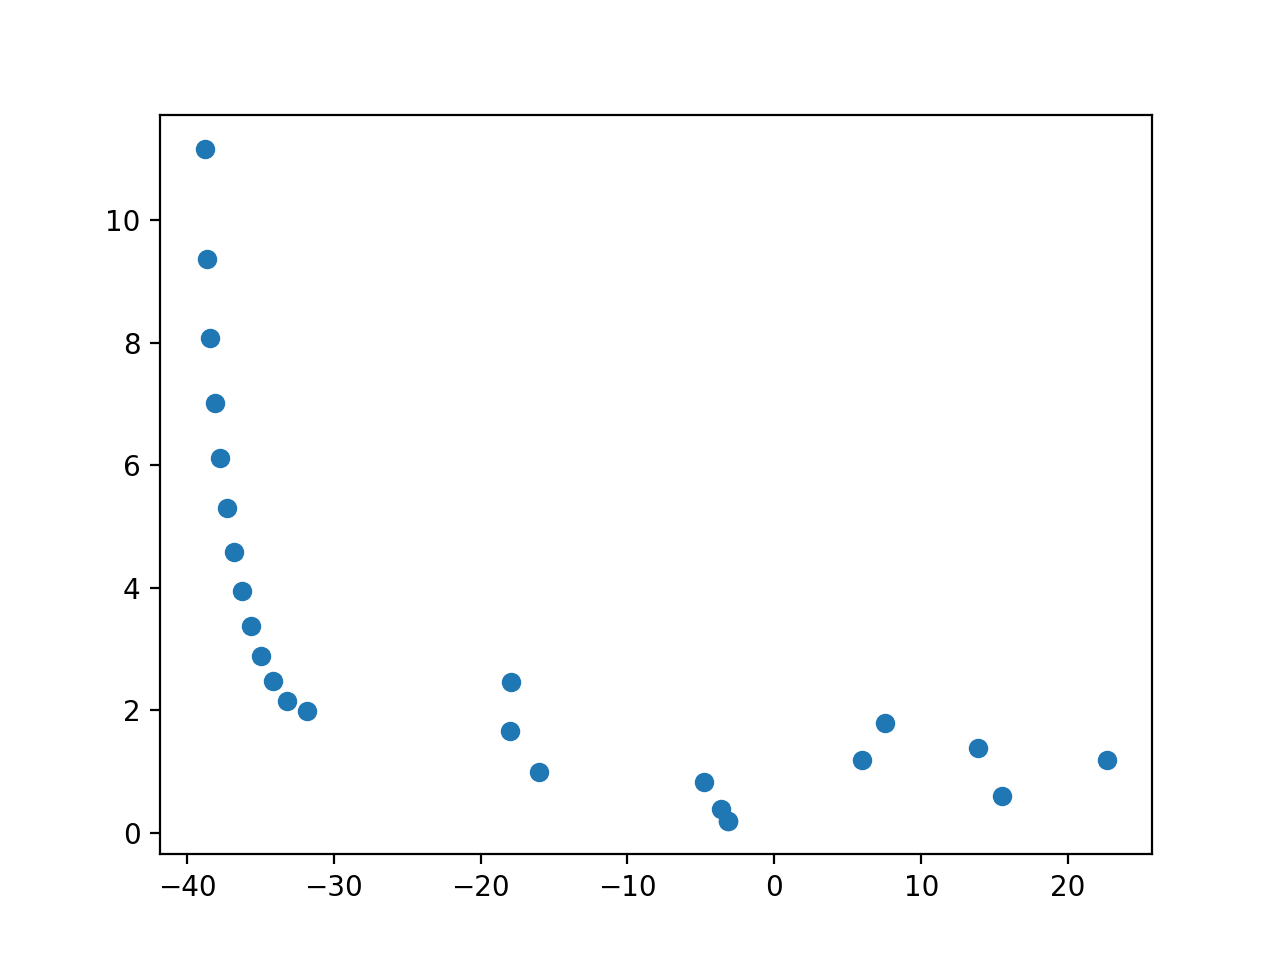

In [7]:
figure()
plot(tab0, tab1, 'o')

<IPython.core.display.Javascript object>


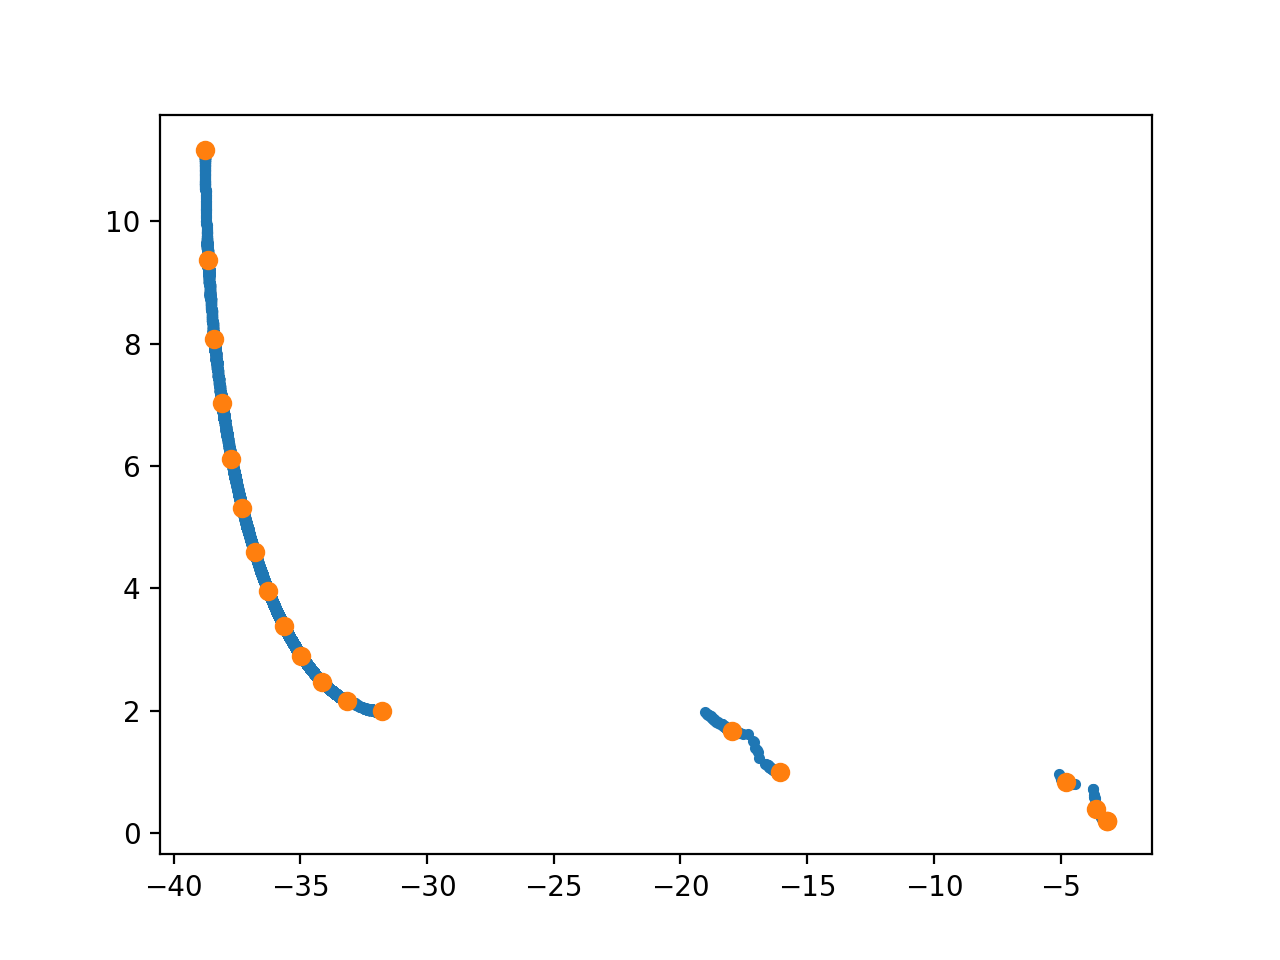

In [8]:
figure()
moes.logger.plot_front()

In [9]:
len(moes.pareto_front)

9

In [ ]:
sorted(tab)

In [ ]:
figure()
moes.logger.plot_divers()

In [ ]:
moes.pareto_front

In [ ]:
[moes.kernels[i].incumbent for i in range(moes.num_kernels)]

In [ ]:
[1 / np.pi * sum(x) for x in moes.pareto_set]

In [ ]:
[1 / np.pi * sum(x) for x in moes.pareto_set]

In [ ]:
[1 / np.pi * sum(x) for x in moes.pareto_set]

In [ ]:
[1 / np.pi * sum(moes.kernels[i].incumbent) for i in range(moes.num_kernels)]

In [ ]:
[moes.kernels[i].objective_values for i in range(moes.num_kernels)]

In [ ]:
moes

In [ ]:
newes = moes.kernels[0]._copy_light()

In [ ]:
newes

In [ ]:
type(moes)

In [ ]:
newes.__class__

In [ ]:
es = cma.CMAEvolutionStrategy(7 * [0], 0.2)

In [ ]:
es.N